In [47]:
# Simple NeuralNetwork

In [48]:
# Torch is base module for pytorch
# NN is for neural network
# F is responsible each forward function in pytorch

import torch
import torch.nn as nn
import torch.nn. functional as F 

In [49]:
#Create a model Class that inherits nn.Module
class Model(nn.Module):

    # Input layer ( 4 features of  the flower) --> 
    # Hidden layer1 (NUmber of neuron) --> 
    # Hidden layer2 (number of neurons) --> 
    # H2 (n) --> 
    # Output ( 3 classes of iris flowers)

    def __init__(self, in_features = 4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)           # Here fc stands for fully connected layer 
        self.fc2 = nn.Linear(h1, h2)                    # Note OUt of one layer will be input of second layer
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))                         # relu stands for Rectified Linear Units
        x = F.relu(self.fc2(x))              
        x = self.out(x)

        return x

In [50]:
# Pick a manual seed for randomization --> So we get the approximate same start

torch.manual_seed(41)
model = Model()

In [51]:
# Import pandas for data manupulation
# Matplotlib fro draw the graph

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# Load the iris dataset

my_df = pd.read_csv('iris.csv')
my_df.head()                          # .head() to get the top rows from the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
# Sinche computer can only understand the name so we wil change our 
# flower name with number using.replace

my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

C:\Users\LC270900\AppData\Local\Temp\ipykernel_14852\2520636152.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('virginica', 2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [54]:
# Train Test Split! X, y
# .drop() we drop the species column from the dataframe, Remaining data store in X matrix
# dataframe['Column_name'] this will store species column in y matrix

X = my_df.drop('species', axis=1)
y = my_df['species']

In [55]:
# Just to check the type of y matrix 
type(y)

pandas.core.series.Series

In [56]:
# Convert these to numpy arrays because we will use sklearn train_test_split
# sklearn module work with numpy arrays only.

X = X.values
y = y.values

In [57]:
# Train Test Split
# import the train_Test_Split module and dive the data in training dataset and split datasett

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [58]:
# Convert X features to float tensors  --> After split change numpy array back to tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [59]:
# Conver y labels as Long tensors --> After split change numpy array back to tensors
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [60]:
# Set the criterion of model to measure teh error how far off the prediction are from the original 

criterion = nn.CrossEntropyLoss()

# Choose Adam Optimaizeer, lr = learning rate (if error doesn't go down after a bunch of iteration (epoch), lower learning rate)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [61]:
# Train our model
# Epochs? (one run thru all the training data in our network)

epoch = 300
losses = []
for i in range(epoch):

    # Go forward and get a prediction
    y_pred = model.forward(X_train) # Get the predicted rseult

    # Measure the loss/error, goona be high at first
    loss = criterion(y_pred, y_train) # predicted values vs the y_train

    # Keep Trach of our losses
    losses.append(loss.detach().numpy())

    #print every 10 epoch
    if i % 10 == 0:
        print(f"Epoch : {i} loss : {loss}")

    # Do some back propagation : Take the error rate of forward propatation and feed it back 
    # thru the network to fine tune the weights

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    


Epoch : 0 loss : 1.1251550912857056
Epoch : 10 loss : 1.0096259117126465
Epoch : 20 loss : 0.8157405853271484
Epoch : 30 loss : 0.585706353187561
Epoch : 40 loss : 0.3999636471271515
Epoch : 50 loss : 0.26768800616264343
Epoch : 60 loss : 0.17942361533641815
Epoch : 70 loss : 0.12151690572500229
Epoch : 80 loss : 0.0860118716955185
Epoch : 90 loss : 0.06520851701498032
Epoch : 100 loss : 0.052865758538246155
Epoch : 110 loss : 0.04508381336927414
Epoch : 120 loss : 0.03979950770735741
Epoch : 130 loss : 0.035970721393823624
Epoch : 140 loss : 0.03293720260262489
Epoch : 150 loss : 0.030419373884797096
Epoch : 160 loss : 0.026795286685228348
Epoch : 170 loss : 0.02338256500661373
Epoch : 180 loss : 0.020531903952360153
Epoch : 190 loss : 0.018495900556445122
Epoch : 200 loss : 0.016802584752440453
Epoch : 210 loss : 0.015520630404353142
Epoch : 220 loss : 0.014499242417514324
Epoch : 230 loss : 0.013446717523038387
Epoch : 240 loss : 0.01267220638692379
Epoch : 250 loss : 0.011893139220

Text(0.5, 0, 'Epoch')

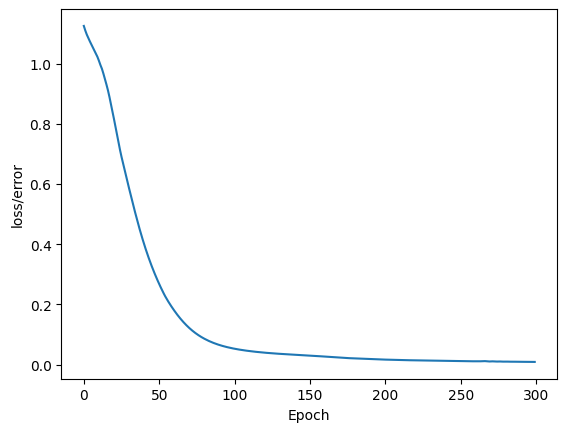

In [74]:
# Draw the graph of our trained machine model.
# Total epoch vs loss, with each epoch loss is reducing that is good

plt.plot(range(epoch), losses)
plt.ylabel('loss/error')
plt.xlabel('Epoch')

In [78]:
# Evaluate MOdel on test data set (validate model on test set)
# Check with our model with test data how much loss we have reduce or not 

with torch.no_grad():                  # Basically turnoff back propgation
    y_eval = model.forward(X_test)     # X_Test are features from our test set, y eval will be predictions
    loss = criterion(y_eval, y_test)   # Find the loss or error

In [79]:
loss

tensor(0.2775)

In [80]:
# IN this block we are checking how many prediction are correct.
# We change species coloumn back to the name 
# If test and prediction value machine it increase the correct by 1 

correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)

        if y_test[i] == 0:
            x = "setosa"
        elif y_test[i] == 1:
            x = "Versicolor"
        elif y_test[i] == 2:
            x= "virginica"
        
     # Will tell us what type of flower class our network think it is
        print(f"{i+1} - {str(y_val)} \t {y_test[i]} \t{y_val.argmax().item()}")

        # Correct or not
        if y_val.argmax().item() == y_test[i]:
            correct +=1

print(f"we got {correct} correct")

1 - tensor([-7.3780,  2.7145, 11.3989]) 	 2 	2
2 - tensor([-10.2013,  -0.2203,  18.8066]) 	 2 	2
3 - tensor([-11.5964,   0.5192,  20.3481]) 	 2 	2
4 - tensor([-0.4136, 11.3053, -5.2562]) 	 1 	1
5 - tensor([-9.7768,  1.4952, 16.2473]) 	 2 	2
6 - tensor([  3.3142,  13.8371, -12.1667]) 	 1 	1
7 - tensor([-6.4890,  4.5426,  8.8239]) 	 2 	2
8 - tensor([-0.0898, 11.7302, -6.0479]) 	 1 	1
9 - tensor([-8.2346,  2.9179, 12.6917]) 	 2 	2
10 - tensor([-10.9019,  -0.2847,  20.0561]) 	 2 	2
11 - tensor([-5.7006,  5.2059,  7.1338]) 	 2 	2
12 - tensor([ 29.0044,  19.1034, -46.0197]) 	 0 	0
13 - tensor([ 26.3051,  17.2823, -41.6481]) 	 0 	0
14 - tensor([  5.2769,  12.3274, -13.5509]) 	 1 	1
15 - tensor([ 24.8150,  17.8363, -40.2874]) 	 0 	0
16 - tensor([-4.6368,  6.5560,  4.5806]) 	 2 	1
17 - tensor([ 26.3830,  17.6821, -42.0243]) 	 0 	0
18 - tensor([-6.6959,  3.6572,  9.7190]) 	 1 	2
19 - tensor([ 27.9599,  18.4019, -44.3303]) 	 0 	0
20 - tensor([ 23.0085,  16.1063, -37.0484]) 	 0 	0
21 - tensor([  4

In [81]:
# Give the randome tensor and then check it can predict or not

new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])

In [ ]:
# Here who every have i high value will be result for example
# here 27.96 high chances so that will be our predicted result.

with torch.no_grad():
    print(model(new_iris))

tensor([ 27.9676,  18.3023, -44.2674])


In [84]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])

In [83]:
with torch.no_grad():
    print(model(newer_iris))

tensor([-7.4014,  2.8249, 11.3840])


In [87]:
## Save our NN model so we can use in the future.  

torch.save(model.state_dict(), 'iris_dataset_train_model.pt')

In [88]:
# Load the saved model

new_model = Model()
new_model.load_state_dict(torch.load('iris_dataset_train_model.pt'))

<All keys matched successfully>

In [89]:
# Make sure it loaded correctly { Check all the hideen layers }
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [92]:
# Testing the model  

rand_iris_set = torch.tensor([5.9, 3.1, 5.2, 1.8])

In [93]:
with torch.no_grad():
    print(new_model(rand_iris_set))

tensor([-7.5692,  2.6275, 11.7867])
